<a href="https://colab.research.google.com/github/mskang222/NLP_2023/blob/main/10%EC%9B%94_27%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#라이브러리 임포트
import pandas as pd
import numpy as np

# sklearn train_test_split의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

농구 선수의 경기 기록을 바탕으로, 그 선수의 포지션을 예측

In [2]:
#데이터 수집
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [3]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [5]:
df.head(50)   #위에서 50개(0~49)만 확인

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
5,Nicolas Batum,SG,1.8,3.4,6.2,5.9,1.1,0.4
6,Bradley Beal,SG,2.9,5.4,3.1,3.5,1.1,0.3
7,Marco Belinelli,SG,1.4,2.2,2.4,2.0,0.6,0.1
8,Patrick Beverley,SG,1.6,1.8,5.9,4.2,1.5,0.4
9,Bismack Biyombo,C,0.0,2.2,7.0,0.9,0.3,1.1


In [6]:
df['Pos'] #df['??']: 데이터의 column(??)을 확인하는 방법

0     SG
1      C
2      C
3      C
4     SG
      ..
95     C
96    SG
97    SG
98     C
99    SG
Name: Pos, Length: 100, dtype: object

In [7]:
df.Pos   # df['Pos']와 같은 의미

0     SG
1      C
2      C
3      C
4     SG
      ..
95     C
96    SG
97    SG
98     C
99    SG
Name: Pos, Length: 100, dtype: object

In [9]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

데이터 시각화

In [10]:
df #데이터 프레임은 엑셀표와 같은 내용

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


Text(0.5, 1.0, 'STL and 2P in 2d plane')

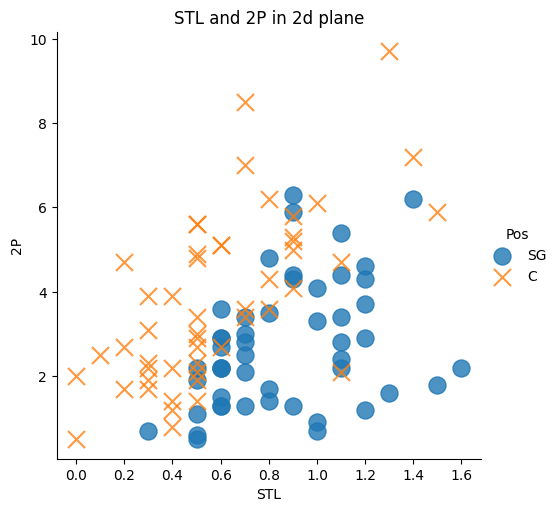

In [11]:
import matplotlib.pyplot as plt  #mathplotlib.pyplot 그림그리는 대표적 모듈
import seaborn as sns            # seaborn형태도 그림그리는 것임
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot(x='STL', y='2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기   s:size
           markers=["o", "x"],
           hue="Pos") # 예측값    Hue:데이터를 x,y로 산포도로 그림

# title
plt.title('STL and 2P in 2d plane')